In [4]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 
import jax.numpy as jnp
from jax.scipy import stats

In [5]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


# Samples

In [6]:
samples_fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/interim_samples_511_plus.npz"

In [7]:
ds = load_dataset(samples_fpath)

In [8]:
ds['hyper']

{'mean_loghlr': array(-0.4),
 'sigma_logflux': array(0.4),
 'shape_noise': array(0.2),
 'sigma_e_int': array(0.3),
 'g1': array(0.02),
 'sigma_loghlr': array(0.05),
 'g2': array(0.),
 'a_logflux': array(14.),
 'mean_logflux': array(2.45)}

In [9]:
ds.keys()

dict_keys(['samples', 'hyper', 'truth'])

In [10]:
ds['truth'].keys()

dict_keys(['x', 'y', 'e2', 'lhlr', 'lf', 'e1'])

In [11]:
ds['samples']['lf'].shape, ds['samples']['e1'].shape, ds['samples']['dx'].shape

((320000, 300), (320000, 300), (320000, 300))

## Check interim sample chains

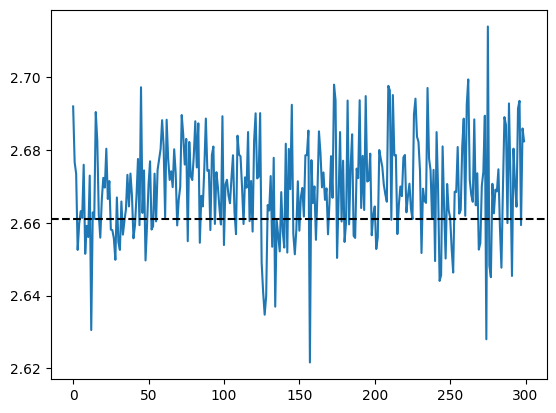

In [11]:
plt.plot(ds['samples']['lf'][5, :])
plt.axhline(ds['truth']['lf'][5], c='k', ls='--')

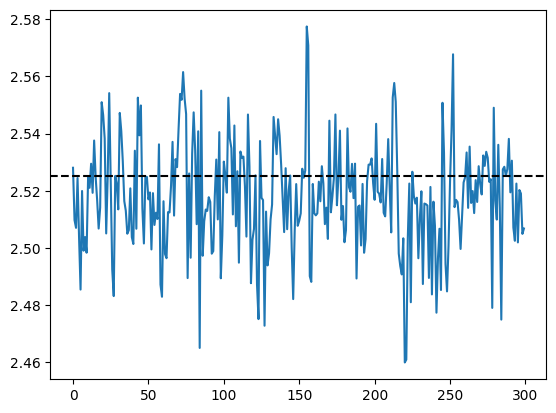

In [13]:
plt.plot(ds['samples']['lf'][7004, :])
plt.axhline(ds['truth']['lf'][7004], c='k', ls='--')

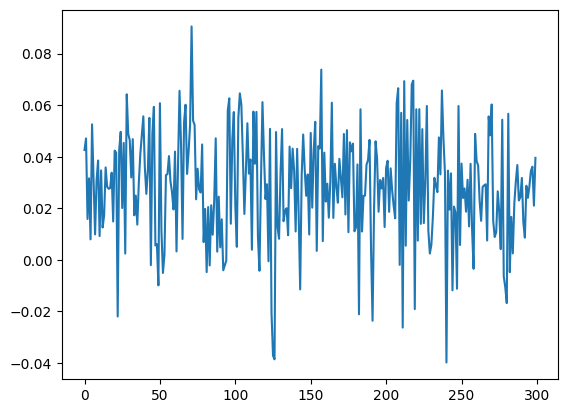

In [14]:
plt.plot(ds['samples']['dx'][1, :])

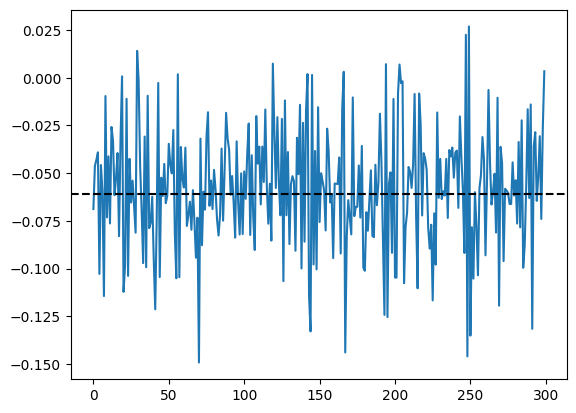

In [15]:
plt.plot(ds['samples']['e1'][3, :])
plt.axhline(ds['truth']['e1'][3], c='k', ls='--')

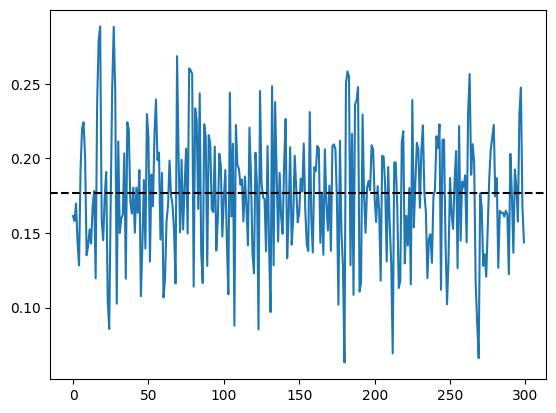

In [16]:
plt.plot(ds['samples']['e2'][33, :])
plt.axhline(ds['truth']['e2'][33], c='k', ls='--')

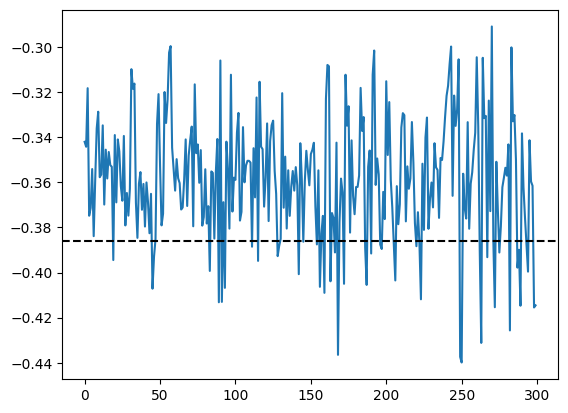

In [17]:
plt.plot(ds['samples']['lhlr'][35, :])
plt.axhline(ds['truth']['lhlr'][35], c='k', ls='--')

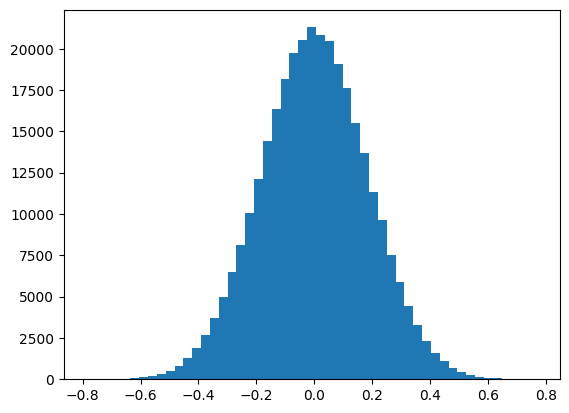

In [18]:
plt.hist(ds['truth']['e1'], bins=51);

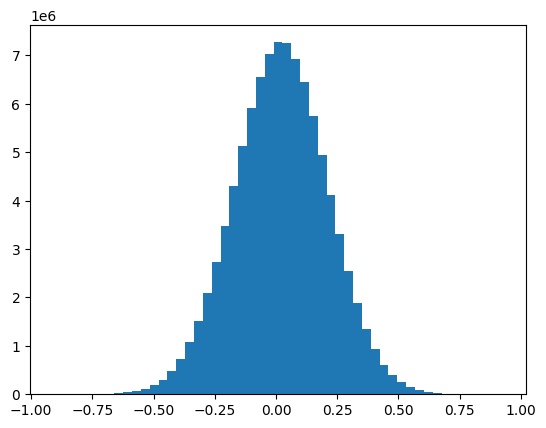

In [19]:
plt.hist(ds['samples']['e1'].ravel(), bins=51);

## Log fluxes and skew flux prior

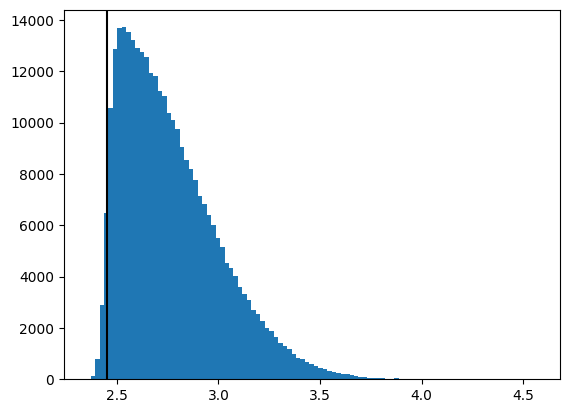

In [20]:
#true flux histogram 
tlf = ds['truth']['lf']
plt.hist(tlf, bins=101)
plt.axvline(2.45,c='k')

In [ ]:
lf = ds['samples']['lf'].ravel()
plt.axvline(2.45,c='k', ls='--')
plt.hist(lf, bins=101, density=True, range=(2.25, 4.0));



# Shear

In [15]:
pfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_plus.npy"
mfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_minus.npy"

In [16]:
gp = np.load(pfpath)
gm = np.load(mfpath)

In [17]:
gp.shape, gm.shape

((3000, 2), (3000, 2))

In [18]:
gp[:, 0].mean(), gp[:, 0].std()

(np.float64(0.020550694288506016), np.float64(0.00033394583902047776))

In [19]:
gm[:, 0].mean(), gm[:, 0].std()

(np.float64(-0.019442216148854493), np.float64(0.000333496731363099))

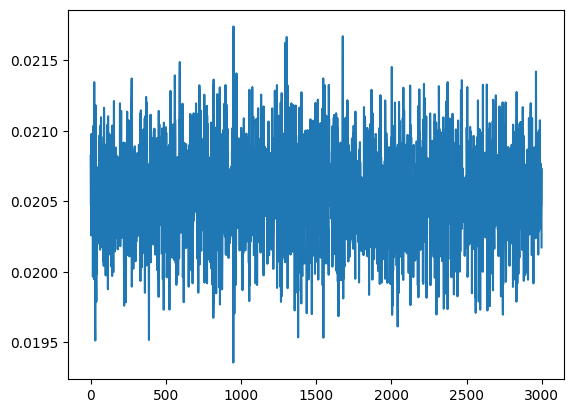

In [20]:
plt.plot(gp[:, 0])

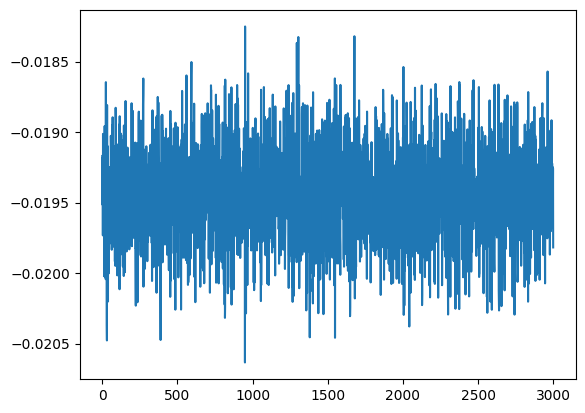

In [21]:
plt.plot(gm[:, 0])

In [22]:
gp.shape

(3000, 2)

In [23]:
m = (gp[:, 0].mean() - gm[:, 0].mean()) / 2 / 0.02 - 1
c = (gp[:, 1].mean() + gm[:, 1].mean()) / 2
m/1e-3, c/1e-3

(np.float64(-0.17723906598732242), np.float64(-0.15476957224010998))

# Alternative method of estimating errors

In [24]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [25]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_514_errs.npz"

In [26]:
ds = load_dataset(fpath)

In [27]:
gps = ds['gp']
gps.shape

(500, 1000, 2)

In [28]:
gms = ds['gm']
gms.shape

(500, 1000, 2)

In [29]:
ms = (gps.mean(1)[:, 0] - gms.mean(1)[:, 0]) / 2/ 0.02  - 1
cs = (gps.mean(1)[:, 0] + gms.mean(1)[:, 0]) / 2
ms.shape, cs.shape

((500,), (500,))

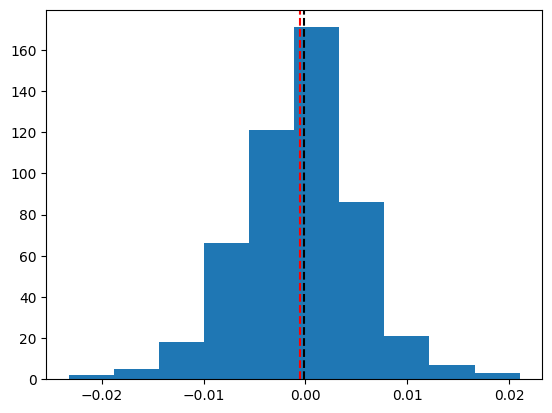

In [30]:
plt.hist(ms)
plt.axvline(m, c='k', ls='--')
plt.axvline(ms.mean(), c='r', ls='--')

In [31]:
ms.mean(), m

(np.float64(-0.0005389407031482609), np.float64(-0.00017723906598732242))

In [32]:
ms.std() / np.sqrt(len(ms)) / 1e-3

np.float64(0.2593647565210029)

In [33]:
cs.mean(), c, cs.std() / np.sqrt(len(cs))

(np.float64(0.000558243706399772),
 np.float64(-0.00015476957224010997),
 np.float64(0.0003439895745915828))

In [34]:
cs.std() / np.sqrt(len(cs))/ 1e-3

np.float64(0.3439895745915828)